<a href="https://colab.research.google.com/github/iLuisOlivares/Sistema-de-control-borroso-de-un-avi-n./blob/main/Parcial_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integrantes:
- Luis Olivares Puello - 0221910015
- Cesar Hernando Leiva - 022191115

In [18]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#Funcion Sigmoidal -> funcion para calcular el valor de y tanto para la sigmoidal izquierda o derecha
def funcionSigmoidal(x,alfa,beta,epsilon, direccion="derecha"):
    if (direccion=="derecha"):
        if(x <= alfa):
            return 0
        elif(alfa <= x and x <= beta):
            return 2*(((x-alfa)/(epsilon-alfa)))**2
        elif(beta <= x and x <= epsilon):
            return 1-2*(((x-epsilon)/(epsilon-alfa))**2)
        elif(x>=epsilon):
            return 1
    elif(direccion=="izquierda"):
        if(x <= alfa):
            return 1
        elif(alfa <= x and x <= beta):
            return 1-2*((x-alfa)/(epsilon-alfa))**2
        elif(x>=beta and x<epsilon):
            return 2*((x-epsilon)/(epsilon-alfa))**2
        elif(x>= epsilon):
            return 0
       

In [20]:
#Funcion gaussiana -> funcion para calcular el valor de y por guassiano
def funcionGaussiana(x,mitad,rango):
      return (np.exp(-((x-mitad)**2)/(2*rango**2)))
    

In [21]:
#Funcion para realizar una grafica simple
def graficar(recta,valores,label_x,label_y):
    plt.plot (recta,valores)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()



#Velocidad

In [22]:
#Definicion de rangos para velocidad
v_rango_inicial = 0
v_rango_final = 1500
v_recta = np.arange(0, 1500, 0.1)

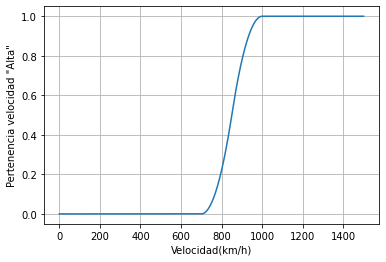

In [23]:
#Velocidad
#Conjunto borroso alta
velocidadAlta = []
label_x = "Velocidad(km/h)"
label_y = 'Pertenencia velocidad "Alta"'

#Funcion de velocidad Alta en un punto x
def funcion_VelocidadAlta(x):
  return funcionSigmoidal(x,alfa=700,beta=850,epsilon=1000,direccion='derecha')

#Rellenar el array 
for x in v_recta:
  velocidadAlta.append(funcion_VelocidadAlta(x))

graficar(v_recta,velocidadAlta,label_x,label_y)


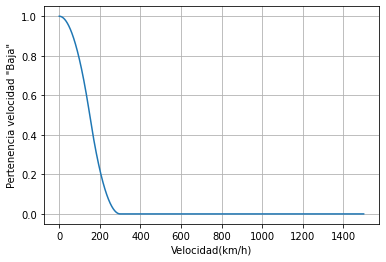

In [24]:
#Velocidad
#Conjunto borroso Baja
velocidadBaja = []
label_x = "Velocidad(km/h)"
label_y = 'Pertenencia velocidad "Baja"'

#Funcion de velocidad Baja en un punto x
def funcion_VelocidadBaja(x):
  return funcionSigmoidal(x,alfa=0,beta=150,epsilon=300,direccion='izquierda')

#Rellenar el array 
for x in v_recta:
  velocidadBaja.append(funcion_VelocidadBaja(x))

graficar(v_recta,velocidadBaja,label_x,label_y)

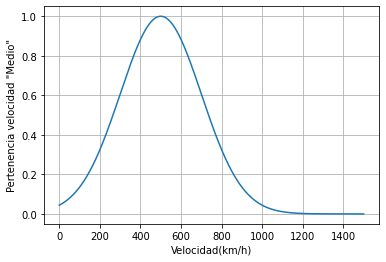

In [25]:
#Velocidad
#Conjunto borroso Medio
velocidadMedio = []
label_x = "Velocidad(km/h)"
label_y = 'Pertenencia velocidad "Medio"'

#Funcion de velocidad Medio en un punto x
def funcion_VelocidadMedio(x):
  return funcionGaussiana(x,mitad=500,rango=200)

#Rellenar el array 
for x in v_recta:
  velocidadMedio.append(funcion_VelocidadMedio(x))

graficar(v_recta,velocidadMedio,label_x,label_y)
int_array = v_recta.astype(int)


Text(420, 0.8824969025845955, '0.8824969025845955')

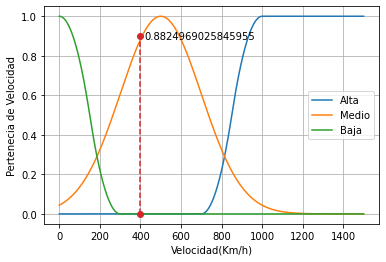

In [26]:
#Translape de velocidad
plt.plot(v_recta,velocidadAlta, label ="Alta")
plt.plot(v_recta,velocidadMedio, label ="Medio")
plt.plot(v_recta,velocidadBaja, label ="Baja")

plt.xlabel('Velocidad(Km/h)')
plt.ylabel('Pertenecia de Velocidad')
plt.grid()
plt.legend()
print()
plt.plot([np.float64(400), np.float64(400)], [0.0,0.90], linestyle="--", marker ="o")
plt.annotate(velocidadMedio[400*10], (420, velocidadMedio[400*10]))


#Angulo

In [27]:
a_rangoi = -10
a_rangof = 11
a_recta = np.arange(-10, 10, 0.1)

In [ ]:
#Angulo
#Conjunto borroso Arriba
anguloArriba = []
label_x = "Angulo(grados)"
label_y = 'Pertenencia angulo "Arriba"'

#Funcion de Angulo Arriba en un punto x
def funcion_AnguloArriba(x):
  return funcionSigmoidal(x,alfa=6,beta=8,epsilon=10,direccion='derecha')

#Rellenar el array 
for x in a_recta:
  anguloArriba.append(funcion_AnguloArriba(x))

graficar(a_recta,anguloArriba,label_x,label_y)

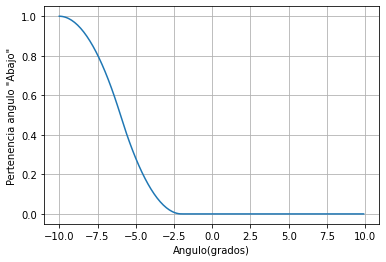

In [29]:

#Conjunto borroso Abajo
anguloAbajo = []
label_x = "Angulo(grados)"
label_y = 'Pertenencia angulo "Abajo"'

#Funcion de Angulo Abajo en un punto x
def funcion_AnguloAbajo(x):
  return funcionSigmoidal(x,alfa=-10,beta=-6,epsilon=-2,direccion='izquierda')

#Rellenar el array 
for x in a_recta:
  anguloAbajo.append(funcion_AnguloAbajo(x))

graficar(a_recta,anguloAbajo,label_x,label_y)


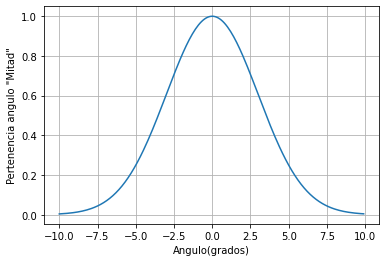

In [30]:
#Angulo
#Conjunto borroso ok
anguloOk = []
label_x = "Angulo(grados)"
label_y = 'Pertenencia angulo "Mitad"'

#Funcion de Angulo ok en un punto x
def funcion_AnguloOk(x):
  return funcionGaussiana(x,mitad=0,rango=3)

#Rellenar el array 
for x in a_recta:
  anguloOk.append(funcion_AnguloOk(x))

graficar(a_recta,anguloOk,label_x,label_y)


Valores de pertenencia para x2 = 0
Valor en el conjunto Angulo Arriba = 0
Valor en el conjunto ok = 1.0
Valor en el conjunto Abajo = 0


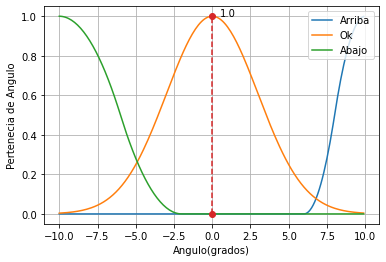

In [31]:
#Translape de Angulo
plt.plot(a_recta,anguloArriba, label = "Arriba")
plt.plot(a_recta,anguloOk, label = "Ok")
plt.plot(a_recta,anguloAbajo, label = "Abajo")

plt.xlabel('Angulo(grados)')
plt.ylabel('Pertenecia de Angulo')
plt.grid()
plt.legend(loc='upper right')
plt.plot([np.float64(0), np.float64(0)], [0.0,1], linestyle="--", marker ="o")
plt.annotate(anguloOk[10*10], (0.5, 1))
print("Valores de pertenencia para x2 = 0")
print(f"Valor en el conjunto Angulo Arriba = {anguloArriba[10*10]}")
print(f"Valor en el conjunto ok = {anguloOk[10*10]}")
print(f"Valor en el conjunto Abajo = {anguloAbajo[10*10]}")


#Posición

In [32]:
p_rangoi = 0
p_rangof = 12
p_recta = np.arange(0, 10, 0.1)

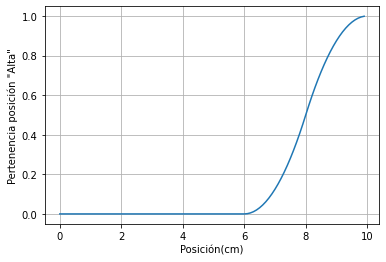

In [33]:
#Posición
#Conjunto borroso Alta
posicionAlta = []
label_x="Posición(cm)"
label_y='Pertenencia posición "Alta"'

#Funcion de Posicion Alta en un punto x
def funcion_PosicionAlta(x):
  return funcionSigmoidal(x,alfa=6,beta=8,epsilon=10,direccion='derecha')

#Rellenar el array 
for x in p_recta:
  posicionAlta.append(funcion_PosicionAlta(x))

graficar(p_recta,posicionAlta,label_x,label_y)


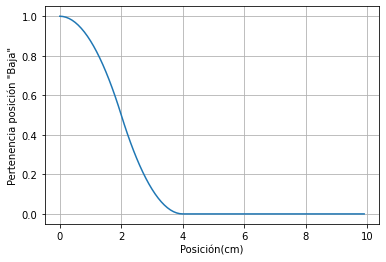

In [34]:
#Posición
#Conjunto borroso Baja
posicionBaja = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Baja"'

#Funcion de Posicion Baja en un punto x
def funcion_PosicionBaja(x):
  return funcionSigmoidal(x,alfa=0,beta=2,epsilon=4,direccion='izquierda')

#Rellenar el array 
for x in p_recta:
  posicionBaja.append(funcion_PosicionBaja(x))

graficar(p_recta,posicionBaja,label_x,label_y)



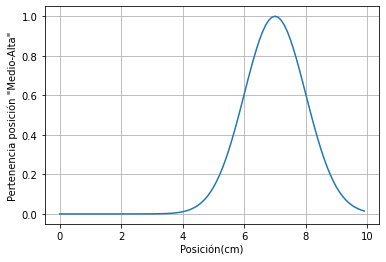

In [35]:
#Posición
#Conjunto borroso Medio-Alta
posicionMAlta = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Medio-Alta"'

#Funcion de Posicion Medio Alta en un punto x
def funcion_PosicionMedioAlta(x):
  return funcionGaussiana(x,mitad=7,rango=1)

#Rellenar el array 
for x in p_recta:
  posicionMAlta.append(funcion_PosicionMedioAlta(x))

graficar(p_recta,posicionMAlta,label_x,label_y)


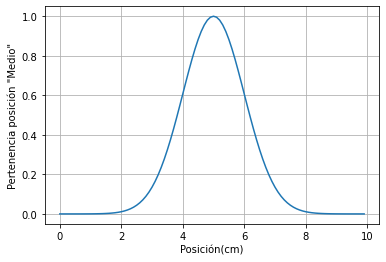

In [36]:
#Posición
#Conjunto borroso Medio
posicionMedio = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Medio"'

#Funcion de Posicion Medio en un punto x
def funcion_PosicionMedio(x):
  return funcionGaussiana(x,mitad=5,rango=1)

#Rellenar el array 
for x in p_recta:
  posicionMedio.append(funcion_PosicionMedio(x))

graficar(p_recta,posicionMedio,label_x,label_y)

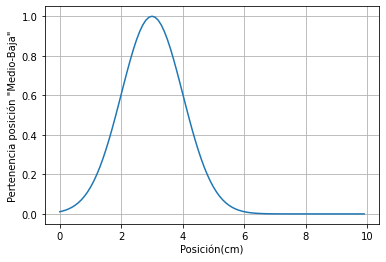

In [38]:
#Posición
#Conjunto borroso Medio-Baja
posicionMBaja = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Medio-Baja"'

#Funcion de Posicion Medio Baja en un punto x
def funcion_PosicionMedioBaja(x):
  return funcionGaussiana(x,mitad=3,rango=1)

#Rellenar el array 
for x in p_recta:
  posicionMBaja.append(funcion_PosicionMedioBaja(x))

graficar(p_recta,posicionMBaja,label_x,label_y)


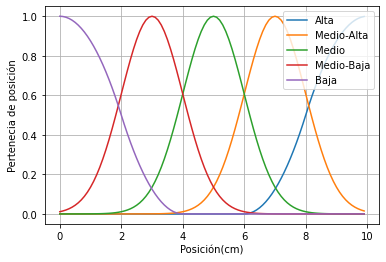

In [39]:
#Translape de Posición
plt.plot(p_recta,posicionAlta,label='Alta')
plt.plot(p_recta,posicionMAlta, label="Medio-Alta")
plt.plot(p_recta,posicionMedio, label = 'Medio')
plt.plot(p_recta,posicionMBaja, label = 'Medio-Baja')
plt.plot(p_recta,posicionBaja, label ='Baja')
plt.xlabel('Posición(cm)')
plt.ylabel('Pertenecia de posición')
plt.legend(loc='upper right')
plt.grid()


# Evaluacion de las reglas

In [40]:
#Funcion de larsen para devolver los minimos de los conjuntos y multiplicarlos
def larsen(*funciones_difusas):
  resultado = []
  for x, funcion_difusa in funciones_difusas:
    #Se agrega a un solo Array todos los valores de entrada donde se selecciona el menor entre ellos
    resultado.append(funcion_difusa(x))
  return min(resultado)

#Funcion para evaluar la regla con respecto a la funcion de salida
def evaluar(resultado_regla, funcion_salida):
  resultado = []
  for x in p_recta:
    #Se multiplica el resultado de larsen con cada valor de la funcion de salida
    resultado.append((resultado_regla * funcion_salida(x)))
  return resultado

#Iniciar las 2 funciones anteriores
def evaluarRegla(x1,funcion_entrada1, x2,funcion_entrada2,funcion_salida):
  regla = larsen((x1, funcion_entrada1), (x2, funcion_entrada2))
  return evaluar(regla, funcion_salida)

In [13]:
#Funcion para graficar el resultado final
#Una grafica donde se muestra el resultado del proceso son Larsen
#Y otra grafica con el translape de los conjuntos difusos de salida
def graficaFinal(rules, agregacion):

  fig, axis= plt.subplots(2,1,figsize=(10,10))
 
  #Larsen
  axis[0].fill(p_recta, agregacion, color = 'cadetblue', label="Larsen aplicado")
  axis[0].legend(loc='upper right')
  axis[0].grid()
  
  #Conjuntos difusos
  axis[1].plot(p_recta, posicionAlta, label = "P Alta")
  axis[1].plot(p_recta, posicionMAlta,  label = "P Medio-Alta")
  axis[1].plot(p_recta, posicionMedio, label = "P Medio")
  axis[1].plot(p_recta, posicionMBaja,  label = "P Medio-Baja")
  axis[1].plot(p_recta, posicionBaja,  label = "P Baja")
  axis[1].legend(loc='upper right')
  axis[1].grid()
  #Reglas
  for rule in rules:
    axis[1].fill(p_recta, rule, color="cadetblue")

 
  

In [11]:
#Sacar el valor maximo de cada regla y realizar agregacion
def agregacion_union(*rules):
  return [max(rule) for rule in zip(*rules)]

In [10]:
#Funcion para calcular el centro de area
def centro_de_areas(recta, valores_membresia):
  suma = 0
  for valor, membresia in zip(recta, valores_membresia):
      suma += valor * membresia
  return suma / sum(valores_membresia)

In [64]:
#Encontrar el index del valor maximo de los valores de membresia
def centro_de_maximos(valores_membresia):
  index = valores_membresia.index(max(valores_membresia))
  return index/10 #Entre 10 para encontrar el valor exacto de x


In [65]:
#Funcion para inicializar e ingresar los valores de entrada
def FuncionInicializar(x1,x2):
  rules = []
  #Reglas
  rule1 = evaluarRegla(int(x1),funcion_VelocidadAlta, int(x2),funcion_AnguloArriba, funcion_PosicionMedioBaja)
  rules.append(rule1)
  rule2 = evaluarRegla(int(x1),funcion_VelocidadAlta, int(x2),funcion_AnguloOk, funcion_PosicionMedioBaja)
  rules.append(rule2)
  rule3 = evaluarRegla(int(x1),funcion_VelocidadAlta, int(x2),funcion_AnguloAbajo, funcion_PosicionBaja)
  rules.append(rule3)
  rule4 = evaluarRegla(int(x1),funcion_VelocidadMedio, int(x2),funcion_AnguloArriba, funcion_PosicionMedioAlta)
  rules.append(rule4)
  rule5 = evaluarRegla(int(x1),funcion_VelocidadMedio, int(x2),funcion_AnguloOk, funcion_PosicionMedio)
  rules.append(rule5)
  rule6 = evaluarRegla(int(x1),funcion_VelocidadMedio, int(x2),funcion_AnguloAbajo, funcion_PosicionMedioBaja)
  rules.append(rule6)
  rule7 = evaluarRegla(int(x1),funcion_VelocidadBaja, int(x2),funcion_AnguloArriba, funcion_PosicionAlta)
  rules.append(rule7)
  rule8 = evaluarRegla(int(x1),funcion_VelocidadBaja, int(x2),funcion_AnguloOk, funcion_PosicionMedioAlta)
  rules.append(rule8)
  rule9 = evaluarRegla(int(x1),funcion_VelocidadBaja, int(x2),funcion_AnguloAbajo, funcion_PosicionMedioAlta)
  rules.append(rule9)

  agregacion = agregacion_union(rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9)

  print("Centro de area:",centro_de_areas(p_recta,agregacion))
  print("Centro de maximos:", centro_de_maximos(agregacion))

  graficaFinal(rules, agregacion)

Ingese un valor de entrada para la velocidad (entre 0 y 1000): 400
Ingrese un valor de entrada para el angulo (entre 0 y 10): 0
Centro de area: 4.999999256639807
Centro de maximos: 5.0


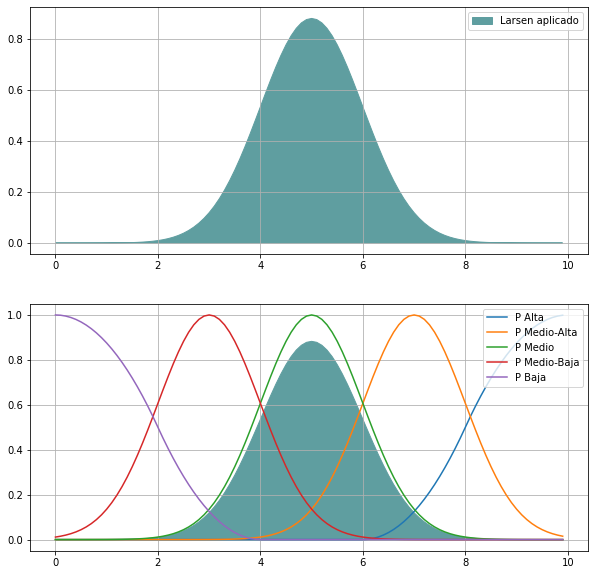

In [69]:
x1=input('Ingese un valor de entrada para la velocidad (entre 0 y 1000): ')
x2=input('Ingrese un valor de entrada para el angulo (entre 0 y 10): ')

FuncionInicializar(x1,x2)